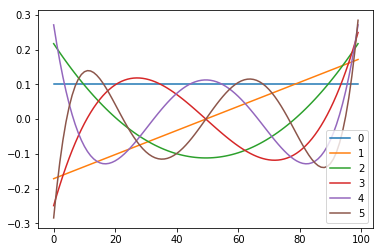

array([[ 1.00e+00,  0.00e+00, -1.10e-04,  0.00e+00, -5.00e-04, -0.00e+00],
       [ 0.00e+00,  1.00e+00,  0.00e+00, -5.30e-04,  0.00e+00, -1.54e-03],
       [-1.10e-04,  0.00e+00,  1.00e+00,  0.00e+00, -1.46e-03, -0.00e+00],
       [ 0.00e+00, -5.30e-04,  0.00e+00,  1.00e+00,  0.00e+00, -3.08e-03],
       [-5.00e-04,  0.00e+00, -1.46e-03,  0.00e+00,  1.00e+00,  0.00e+00],
       [-0.00e+00, -1.54e-03, -0.00e+00, -3.08e-03,  0.00e+00,  1.00e+00]])

In [35]:
import numpy as np
from scipy.special import legendre
import matplotlib.pyplot as plt

class basis_projector:
    def __init__(self, order=5):
        self.poly = [legendre(iOrd) for iOrd in range(order)]
        
    def evaluate(self, nStep):
        # Sample in midpoints in order to reduce finite sample error
        x = np.linspace(-1, 1, nStep, endpoint=False) + 1 / nStep
        rezLst = [np.polyval(p, x) for p in self.poly]
        nrmLst = np.sqrt([np.dot(v,v) for v in rezLst])
        return [rez / nrm for rez,nrm in zip(rezLst, nrmLst)]
    
nBasis = 6
nStep = 100
BP = basis_projector(nBasis)
rez = BP.evaluate(nStep)

plt.figure()
for i in range(nBasis):
    plt.plot(rez[i], label=str(i))
plt.legend()
plt.show()

M = np.zeros((nBasis, nBasis))
for i in range(nBasis):
    for j in range(nBasis):
        M[i][j] = np.dot(rez[i], rez[j])
        
np.round(M, 5)